In [ ]:
# Define Early Stopping object
es = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True, verbose=1
)

# Make mlp classifier object
mlp_clf = KerasClassifier(model=create_model,
                          epochs=100,
                          batch_size=32,
                          validation_split=0.2,
                          callbacks=[es])

# Define pipeline with MLP classifier
mlp_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor_v1),
    ('mlp', mlp_clf)
])

# Fit pipeline
mlp_pipe.fit(X_train, y_train)

Epoch 1/100
4966/4966 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - loss: 0.0081 - precision_at_recall_4: 0.0124 - val_loss: 9.5676e-04 - val_precision_at_recall_4: 0.8676
Epoch 2/100
4966/4966 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - loss: 0.0011 - precision_at_recall_4: 0.6987 - val_loss: 9.2607e-04 - val_precision_at_recall_4: 0.8714
Epoch 3/100
4966/4966 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 9.0652e-04 - precision_at_recall_4: 0.8240 - val_loss: 8.3359e-04 - val_precision_at_recall_4: 0.8696
Epoch 4/100
4966/4966 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 8.6359e-04 - precision_at_recall_4: 0.7087 - val_loss: 0.0010 - val_precision_at_recall_4: 0.8732
Epoch 5/100
4966/4966 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 8.5304e-04 - precision_at_recall_4: 0.8569 - val_loss: 7.6726e-04 - val_precision_at_recall_4: 0.9032
Epoch 6/100
4966/4966 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 5.2332e-04 - precision_at_recall_4: 0.8634 - val_loss: 9.1133e-04 - val_precision_at_recall_4: 0.8451
Epoch 7/100
4966

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop_cols', 'drop',
                                                  ['Time', 'Amount'])])),
                ('mlp',
                 KerasClassifier(batch_size=32, callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x151dc6c00>], epochs=100, model=<function create_model at 0x1538285e0>, validation_split=0.2))])

2660/2660 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


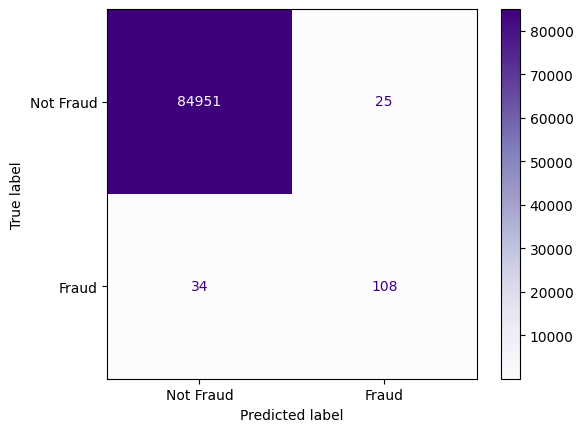

In [ ]:
# Predict on test set and visualize performance with confusion matrix
y_pred_mlp = mlp_pipe.predict(X_test)

cm_mlp = confusion_matrix(y_test, y_pred_mlp)

mlp_results = {
    'Model': 'Multi Layer Perceptron',
    'Sampling': 'NONE',
    'Recall':round(recall_score(y_test, y_pred_mlp),2),
    'Precision': round(precision_score(y_test, y_pred_mlp),2),
    'F1 Score': round(f1_score(y_test, y_pred_mlp),2),
    'PR-AUC': round(average_precision_score(y_test, y_pred_mlp),2),
    'ROC-AUC': round(roc_auc_score(y_test, y_pred_mlp),2),
    'True Negative': cm_mlp[0,0],
    'False Positive': cm_mlp[0,1],
    'False Negative': cm_mlp[1,0],
    'True Positive': cm_mlp[1,1]
}

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp, display_labels=['Not Fraud', 'Fraud'], values_format='d', cmap='Purples');

In [ ]:
mlp_results_df = pd.DataFrame([mlp_results]).set_index(['Model','Sampling'])

In [ ]:
mlp_results_df

,,Recall,Precision,F1 Score,PR-AUC,ROC-AUC,True Negative,False Positive,False Negative,True Positive
Model,Sampling,,,,,,,,,
Multi Layer Perceptron,NONE,0.75,0.89,0.82,0.67,0.88,84963,13,35,107


In [ ]:
test_scores_df = pd.read_csv('../data/test_scores.csv')
test_scores_df = test_scores_df.set_index(['Model','Sampling'])
test_scores_df = pd.concat([test_scores_df, mlp_results_df])
test_scores_df.to_csv('../data/test_scores.csv')

In [ ]:
test_scores_df

Recall  Precision  F1 Score  PR-AUC  \
Model                  Sampling                                           
Logistic Regression    No Sampling    0.62       0.90      0.73    0.56   
                       RUS            0.88       0.11      0.20    0.10   
                       SMOTE          0.85       0.18      0.30    0.15   
                       SMOTE+RUS      0.85       0.18      0.30    0.16   
                       SMOTETomek     0.82       0.24      0.37    0.20   
                       SMOTEENN       0.82       0.24      0.37    0.19   
Random Forest          No Sampling    0.76       0.95      0.84    0.72   
                       RUS            0.85       0.11      0.20    0.10   
                       SMOTE          0.79       0.88      0.83    0.69   
                       SMOTE+RUS      0.80       0.85      0.82    0.68   
                       SMOTETomek     0.77       0.86      0.81    0.66   
                       SMOTEENN       0.78       0.83      0.80    0.65   
XGBoost                No Sampling    0.77       0.92      0.84    0.72   
                       RUS            0.85       0.11      0.20    0.10   
                       SMOTE          0.80       0.82      0.81    0.65   
                       SMOTE+RUS      0.80       0.76      0.78    0.60   
                       SMOTETomek     0.80       0.83      0.81    0.66   
                       SMOTEENN       0.80       0.76      0.78    0.60   
Multi Layer Perceptron NONE           0.75       0.83      0.79    0.62   
                       NONE           0.75       0.89      0.82    0.67   

                                    ROC-AUC  True Negative  False Positive  \
Model                  Sampling                                              
Logistic Regression    No Sampling     0.81          84966              10   
                       RUS             0.93          83990             986   
                       SMOTE           0.92          84436             540   
                       SMOTE+RUS       0.92          84442             534   
                       SMOTETomek      0.91          84601             375   
                       SMOTEENN        0.91          84597             379   
Random Forest          No Sampling     0.88          84970               6   
                       RUS             0.92          84036             940   
                       SMOTE           0.89          84960              16   
                       SMOTE+RUS       0.90          84956              20   
                       SMOTETomek      0.88          84958              18   
                       SMOTEENN        0.89          84953              23   
XGBoost                No Sampling     0.89          84967               9   
                       RUS             0.92          84037             939   
                       SMOTE           0.90          84951              25   
                       SMOTE+RUS       0.90          84940              36   
                       SMOTETomek      0.90          84952              24   
                       SMOTEENN        0.90          84940              36   
Multi Layer Perceptron NONE            0.87          84955              21   
                       NONE            0.88          84963              13   

                                    False Negative  True Positive  
Model                  Sampling                                    
Logistic Regression    No Sampling              54             88  
                       RUS                      17            125  
                       SMOTE                    22            120  
                       SMOTE+RUS                22            120  
                       SMOTETomek               25            117  
                       SMOTEENN                 25            117  
Random Forest          No Sampling              34            108  
                       RUS                      22      

In [ ]:
mlp_pipe.named_steps['mlp'].model_.loss

'binary_focal_crossentropy'

In [ ]:
# Define parameter grid
param_distributions = {
    'mlp__model__learning_rate': uniform(0.0005, 0.005),  # Smaller range
    'mlp__model__neurons': randint(64, 128),  # No small networks
    'mlp__model__dropout_rate': uniform(0.2, 0.4),  # Dropout is now reasonable
    'mlp__epochs': [50, 100],  # Avoid unnecessary low values
    'mlp__batch_size': [32, 64]  # Avoid extreme batch sizes
}

# Run Randomized Search
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
random_search_mlp = RandomizedSearchCV(mlp_pipe, param_distributions, n_iter=10, cv=skf, verbose=1, n_jobs=-1)

# Fit model
random_search_mlp.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters:", random_search_mlp.best_params_)


mlp_tuned = random_search_mlp.best_estimator_
mlp_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


2025-02-10 20:18:10.513174: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-10 20:18:10.532538: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-10 20:18:10.547021: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-10 20:18:10.547350: I tensorflow/core/platform/cpu_featu

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 0.0066 - precision_at_recall_3: 0.0063 - val_loss: 0.0014 - val_precision_at_recall_3: 0.8846
Epoch 2/100
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 0.0062 - precision_at_recall_3: 0.0063 - val_loss: 0.0025 - val_precision_at_recall_3: 0.8571
Epoch 2/100
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 0.0058 - precision_at_recall_3: 0.0250 - val_loss: 9.4150e-04 - val_precision_at_recall_3: 0.9038
Epoch 2/100
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 0.0081 - precision_at_recall_3: 0.0073 - val_loss: 8.0145e-04 - val_precision_at_recall_3: 0.8889
   1/3973 ━━━━━━━━━━━━━━━━━━━━ 6:18 95ms/step - loss: 8.8625e-05 - precision_at_recall_3: 0.0000e+00Epoch 2/100
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.0014 - precision_at_recall_3: 0.5725 - val_loss: 7.5840e-04 - val_precision_at_recall_3: 0.8596
Epoch 3/100
3973/3973 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop_cols', 'drop',
                                                  ['Time', 'Amount'])])),
                ('mlp',
                 KerasClassifier(batch_size=32, callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x15923adb0>], epochs=100, model=<function create_model at 0x154a476a0>, model__dropout_rate=0.37840920206250117, model__learning_rate=0.0008773260590279343, model__neurons=83, validation_split=0.2))])

2660/2660 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


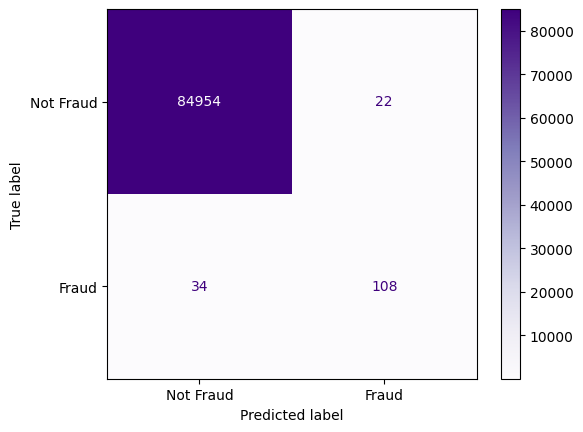

In [ ]:
mlp_tuned_preds = mlp_tuned.predict(X_test)
cm_mlp_tuned = confusion_matrix(y_test, y_pred_mlp)

mlp_tuned_results = {
    'Model': 'Multi Layer Perceptron',
    'Sampling': 'NONE',
    'Recall':round(recall_score(y_test, mlp_tuned_preds),2),
    'Precision': round(precision_score(y_test, mlp_tuned_preds),2),
    'F1 Score': round(f1_score(y_test, mlp_tuned_preds),2),
    'PR-AUC': round(average_precision_score(y_test, mlp_tuned_preds),2),
    'ROC-AUC': round(roc_auc_score(y_test, mlp_tuned_preds),2),
    'True Negative': cm_mlp[0,0],
    'False Positive': cm_mlp[0,1],
    'False Negative': cm_mlp[1,0],
    'True Positive': cm_mlp[1,1]
}

ConfusionMatrixDisplay.from_predictions(y_test, mlp_tuned_preds, display_labels=['Not Fraud', 'Fraud'], values_format='d', cmap='Purples');

In [ ]:
mlp_tuned_results

{'Model': 'Multi Layer Perceptron',
 'Sampling': 'NONE',
 'Recall': 0.76,
 'Precision': 0.83,
 'F1 Score': 0.79,
 'PR-AUC': 0.63,
 'ROC-AUC': 0.88,
 'True Negative': 84963,
 'False Positive': 13,
 'False Negative': 35,
 'True Positive': 107}

---
---
## Hyperparameter Tuning with BayesSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint, loguniform

from joblib import dump

In [ ]:
grids = {
    'logreg_rus' : {
        'rus__sampling_strategy': uniform(loc=0.2, scale=1.0),
        'classifier__max_iter': randint(500, 5001),
        'classifier__C': loguniform(0.01, 10.0)
        },
                               
    'xgboost_smote' : {
        'smote__sampling_strategy': uniform(loc=0.2, scale=0.8),
        'smote__k_neighbors': randint(3, 8),
        'classifier__n_estimators': randint(100, 501),
        'classifier__max_depth': randint(3, 11),
        'classifier__learning_rate': loguniform(0.01, 0.3),
        'classifier__subsample': uniform(loc=0.6, scale=0.4)
        },

    'rf_smote_rus' : {
        'smote__sampling_strategy': uniform(loc=0.2, scale=0.8),
        'smote__k_neighbors': randint(3, 8),
        'rus__sampling_strategy': uniform(loc=0.2, scale=0.8),
        'classifier__n_estimators': randint(100, 501),
        'classifier__max_depth': randint(3, 21),
        'classifier__min_samples_split': randint(2, 21),
        'classifier__min_samples_leaf': randint(1, 21)}
}

In [ ]:
def random_search_cv(algorithm, pipe_steps, param_grid, preprocessor='v1', scoring='Recall', n_iter=10, cv=5, n_jobs=-1):
    
    if preprocessor == 'v1':
        preproc = ColumnTransformer(
            transformers=[('drop_cols', 'drop', ['Time', 'Amount'])],
            remainder='passthrough')
    else:
        preproc = preprocessor

    steps = pipe_steps.copy()

    if preproc:
        steps.insert(0, ('preprocessor', preproc))

    steps.append(('classifier', algorithm))

    pipe = imbPipe(steps=steps)
    rscv = RandomizedSearchCV(pipe,
                              param_distributions=param_grid,
                              n_iter=n_iter,
                              cv=cv,
                              scoring=scoring,
                              random_state=13,
                              n_jobs=n_jobs)
    
    rscv.fit(X_train, y_train)
    best_params = rscv.best_params_
    best_score = rscv.best_score_
    best_model = rscv.best_estimator_

    return best_model, best_params, best_score

In [ ]:
lr_best_model, lr_best_params, lr_best_score = random_search_cv(algorithms['Logistic Regression'], pipe_steps=pipelines['RUS'], param_grid=grids['logreg_rus'], scoring='average_precision')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/

In [ ]:
lr_best_score

0.6774775322396709

In [ ]:
lr_randsearch = lr_best_model
dump(lr_randsearch, '../models/lr_rus.joblib')

['../models/lr_rus.joblib']

In [ ]:
xgb_best_model, xgb_best_params, xgb_best_score = random_search_cv(algorithms['XGBoost'], pipe_steps=pipelines['SMOTE'], param_grid=grids['xgboost_smote'], scoring='average_precision')

In [ ]:
xgb_best_score

0.854305911775942


In [ ]:
xgb_randsearch = xgb_best_model
dump(lr_randsearch, '../models/xgb_smote.joblib')

['../models/xgb_smote.joblib']

In [ ]:
rf_best_model, rf_best_params, rf_best_score = random_search_cv(algorithms['Random Forest'], pipe_steps=pipelines['SMOTE+RUS'], param_grid=grids['rf_smote_rus'], scoring='average_precision')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "

In [ ]:
rf_best_score

0.8431673092855443

In [ ]:
rf_randsearch = rf_best_model
dump(lr_randsearch, '../models/rf_smote_rus.joblib')

['../models/rf_smote_rus.joblib']

In [ ]:
best_models = {
    'Logistic Regression: RUS': lr_best_model,
    'Random Forest: SMOTE + RUS': rf_best_model,
    'XGBoost: SMOTE': xgb_best_model}

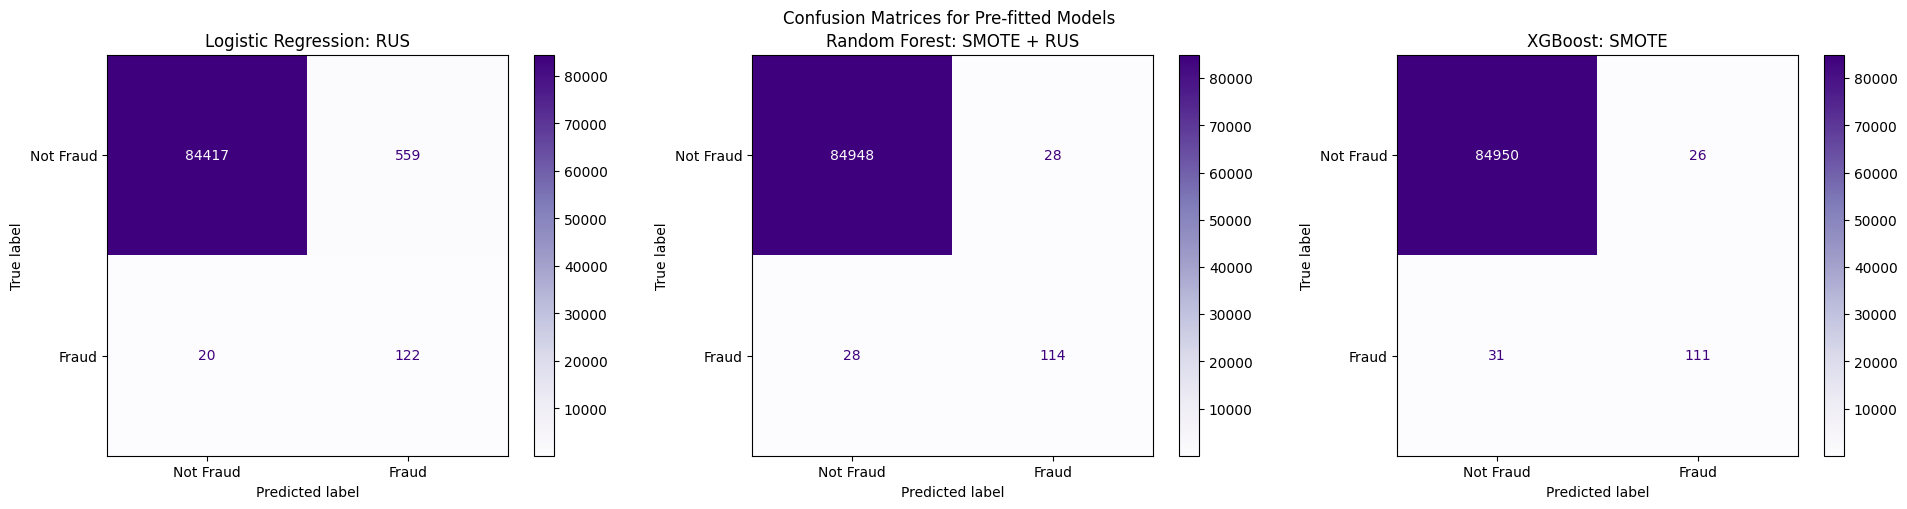

,True Negative,False Positive,False Negative,True Positive,Recall,Precision,F1 Score,PR-AUC
Model,,,,,,,,
Logistic Regression: RUS,84417,559,20,122,0.86,0.18,0.3,0.15
Random Forest: SMOTE + RUS,84948,28,28,114,0.80,0.80,0.8,0.64
XGBoost: SMOTE,84950,26,31,111,0.78,0.81,0.8,0.63


In [ ]:
cm_evaluation(X_train, y_train, X_test, y_test, algorithms=best_models, pre_fitted=True, pipelines=None, preprocessor='v1', calculate_scores=True, normalize=None, cmap='Purples', cols=3)